# NumPy

install numpy and matplotlib
```
conda install numpy=1.23.5
conda install matplotlib=3.6.2
```


In [2]:
import numpy as np
import matplotlib
import sys
print(sys.version)
print(np.__version__)
print(matplotlib.__version__)

3.9.15 (main, Nov 24 2022, 08:28:41) 
[Clang 14.0.6 ]
1.23.5
3.6.2


## Array creation

The functions I find most useful for array creation are:
 - `np.array`
 - `np.full`
 - `np.zeros`
 - `np.ones`
 - `np.empty`
 - `np.full_like`
 - `np.zeros_like`
 - `np.ones_like`
 - `np.empty_like`
 - `np.fromfunction`
 - `np.arange`
 - `np.linspace`

In [2]:
# Python style guide (PEP 8) recommends using implicit line continuation. Python 风格指南 (PEP 8) 建议使用隐式续行。
# An implicit line continuation happens whenever Python gets to the end of a line of code  每当 Python 到达一行代码的末尾时，就会发生隐式续行
# and sees that there's more to come 并且看到还有更多的东西要来
# because a parenthesis ((), square bracket ([) or curly brace ({) has been left open. 因为圆括号 (()、方括号 ([) 或大括号 ({) 一直处于打开状态。
'''
the following line changing is not allowed 不允许更改以下行
a =
8
'''

# list of list(3 lists of element)
a = np.array([[200, 201, 202, 203], 
              [210, 211, 212, 213], 
              [220, 221, 222, 223]],
              dtype = np.uint8)  # specify the data type of array: int
print(a)

[[200 201 202 203]
 [210 211 212 213]
 [220 221 222 223]]


In [8]:
a = np.full((2,5), 8, dtype = np.uint8) # fill with 8s
print(a)

[[8 8 8 8 8]
 [8 8 8 8 8]]


In [4]:
a = np.zeros((2,5), dtype = np.uint8)
print(a)

[[0 0 0 0 0]
 [0 0 0 0 0]]


In [5]:
a = np.empty((2,4), dtype = np.float32) # placeholder
print(a) # cannot rely on entries being a specific value
         # even if you're seeing something like all 0's.

[[0.0000000e+00 0.0000000e+00 2.6185597e-14 1.4012985e-45]
 [2.5868200e-14 1.4012985e-45 2.6265692e-14 1.8367239e-40]]


In [9]:
b = np.full_like(a, 28) # same shape and data type as a, fill with 28s
print(b)

[[28 28 28 28 28]
 [28 28 28 28 28]]


In [12]:
a = np.fromfunction(lambda i, j: 2**i * 3**j, (2,5), dtype = np.float32)
print(a)
b = np.fromfunction(lambda i,j: i+j, (3,3), dtype = np.uint8)
print(b)

# (i = 0,j = 0), (i = 0, j = 1), ..., (i = 0, j = 4)

[[  1.   3.   9.  27.  81.]
 [  2.   6.  18.  54. 162.]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


(1000, 2000, 3)


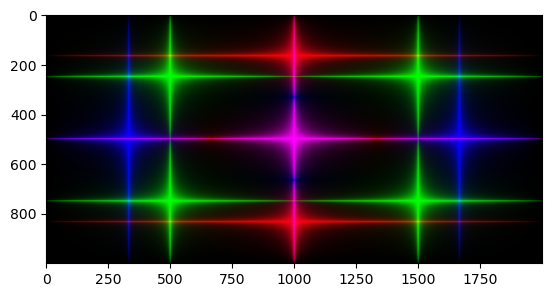

In [13]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

h = 1000
w = 2000

def f(y, x, c):
    z = np.abs( np.tan(np.pi * (c + 1) * x / w) * np.tan(np.pi * (3 - c) * y / h) )  # just some formula I made up
    return z / (50 + z)

img = np.fromfunction(f, (h, w, 3), dtype = np.float32)  # (h, w, 3) equivalent (height, weight, color)
print(img.shape)
plt.imshow(img)

In [14]:
a = np.arange(18, dtype = np.int32)
print(a)

a = np.arange(18, dtype = np.float32)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


In [10]:
a = np.arange(8, 18, dtype = np.int32)
print(a)

[ 8  9 10 11 12 13 14 15 16 17]


In [10]:
# for i in range(8, 18, 3):
# print(i)

a = np.arange(8, 18, 3, dtype = np.int32)
print(a)

[ 8 11 14 17]


In [12]:
a = np.arange(18, 8, -1, dtype = np.int32)
print(a)

[18 17 16 15 14 13 12 11 10  9]


In [13]:
'''
The interval does not include the "end" value, 
except in some cases where step is not an integer
and floating point round-off affects the length of out.
'''
a = np.arange(1000.01, 1000.05, 0.00999, dtype = np.float32)
print(a[-1] < 1000.05)
print(a)

False
[1000.01    1000.02    1000.03    1000.04004 1000.05005]


In [12]:
#When using a non-integer step, such as 0.1, it is often better to use numpy.linspace.

a = np.arange(1000.0, 1000.05, 0.01, dtype = np.float32)
b = np.linspace(1000.0, 1000.05, 5, endpoint = False, dtype = np.float32)
# divide the interval [1000.0, 1000.05] up equally using 5 points excluding the right endpoint.

print(a[-1])  # we should expect 1000.04
print(b[-1])
print(b)

c = np.linspace(1000.0, 1000.05, 6, endpoint = True, dtype = np.float32)
print(c)
c = np.linspace(1000.0, 1000.05, 6, dtype = np.float32)
print(c)


1000.04004
1000.04
[1000.   1000.01 1000.02 1000.03 1000.04]
[1000.   1000.01 1000.02 1000.03 1000.04 1000.05]
[1000.   1000.01 1000.02 1000.03 1000.04 1000.05]


In [13]:
'''
suppose we want to create a grid on [-1, 1] with dx = 0.01
[-1, -0.99, -0.98, ..., 0.99, 1]
'''

np.linspace(-1,1,201)

array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
       -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
       -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
       -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
       -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
       -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,
        0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,
        0.26,  0.27,

## Converting type

In [16]:
# uint means “unsigned integer” while int means “signed integer”
a = np.arange(254.5, 258.5, 0.5, dtype = np.float32)
b = a.astype(np.int32)
c = b.astype(np.uint32)

print('a ==')
print(a)
print('dtype =', a.dtype)
print('')

print('b ==')
print(b)
print('dtype =', b.dtype)
print('')

print('c ==')
print(c)
print('dtype =', c.dtype)
print('')

a ==
[254.5 255.  255.5 256.  256.5 257.  257.5 258. ]
dtype = float32

b ==
[254 255 255 256 256 257 257 258]
dtype = int32

c ==
[254 255 255 256 256 257 257 258]
dtype = uint32



In [17]:
d = c.astype(np.uint8)

print('d ==')
print(d)
print('dtype =', d.dtype) # uint8 data type (i.e., an unsigned integer with 8 bits), which can only represent values from 0 to 255
print('')

d ==
[254 255 255   0   0   1   1   2]
dtype = uint8



## Addition and multiplication of numpy arrays

In [17]:
import numpy as np

a = np.fromfunction(lambda i, j: 10000 +   10*i +     j, (2,5), dtype = np.int32)
b = np.fromfunction(lambda i, j: 20000 + 1000*i + 100*j, (2,5), dtype = np.int32)

print(a)
print('+')
print(b)
print('==')
print(a + b)

[[10000 10001 10002 10003 10004]
 [10010 10011 10012 10013 10014]]
+
[[20000 20100 20200 20300 20400]
 [21000 21100 21200 21300 21400]]
==
[[30000 30101 30202 30303 30404]
 [31010 31111 31212 31313 31414]]


In [18]:
import numpy as np

a = np.array([[2, 3, 5], [7, 11, 13]])
b = -a

print(a)
print('*')
print(b)
print('==')
print(a * b)

[[ 2  3  5]
 [ 7 11 13]]
*
[[ -2  -3  -5]
 [ -7 -11 -13]]
==
[[  -4   -9  -25]
 [ -49 -121 -169]]


Note this is NOT matrix multiplication. 
It just multiplies corresponding entries.

In [20]:
a = np.ones((2,5))
b = np.ones((5,))
print(a)
print(b)
print(a + b)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[1. 1. 1. 1. 1.]
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


## Broadcasting

In [21]:
import numpy as np

**Example 1**

In [20]:
a = np.array([[1100, 1200, 1300], [2100, 2200, 2300]], dtype = np.int32)
b = np.array([[1, 2, 3], [4, 5, 6]], dtype = np.int32)

print('a ==')
print(a)
print('')

print('b ==')
print(b)
print('')

print("a shape: ", a.shape, "b shape:", b.shape)
print('')

print(a + b)

a ==
[[1100 1200 1300]
 [2100 2200 2300]]

b ==
[[1 2 3]
 [4 5 6]]

a shape:  (2, 3) b shape: (2, 3)

[[1101 1202 1303]
 [2104 2205 2306]]


**Example 2**

In [21]:
a = np.array([[1100, 1200, 1300], [2100, 2200, 2300]], dtype = np.int32)
b = np.array([[1], [2]], dtype = np.int32)

print('a ==')
print(a)
print('')

print('b ==')
print(b)
print('')

print("a shape: ", a.shape, "b shape:", b.shape)
print('')

print(a + b)

a ==
[[1100 1200 1300]
 [2100 2200 2300]]

b ==
[[1]
 [2]]

a shape:  (2, 3) b shape: (2, 1)

[[1101 1201 1301]
 [2102 2202 2302]]


**Example 3**

In [22]:
a = np.array([[1100, 1200, 1300], [2100, 2200, 2300]], dtype = np.int32)
b = np.array([[1, 2, 3]], dtype = np.int32)

print('a ==')
print(a)
print('')

print('b ==')
print(b)
print('')

print("a shape: ", a.shape, "b shape:", b.shape)
print('')

print(a + b)

a ==
[[1100 1200 1300]
 [2100 2200 2300]]

b ==
[[1 2 3]]

a shape:  (2, 3) b shape: (1, 3)

[[1101 1202 1303]
 [2101 2202 2303]]


**Example 4**

In [23]:
a = np.array([[1100, 1200, 1300], [2100, 2200, 2300]], dtype = np.int32)
b = np.array([1, 2, 3], dtype = np.int32)

print('a ==')
print(a)
print('')

print('b ==')
print(b)
print('')

print("a shape: ", a.shape, "b shape:", b.shape)
print('')

print(a + b)

a ==
[[1100 1200 1300]
 [2100 2200 2300]]

b ==
[1 2 3]

a shape:  (2, 3) b shape: (3,)

[[1101 1202 1303]
 [2101 2202 2303]]


**The rules of broadcasting**

 - If the input arrays do not have the same number of axes, 

   operations will behave as though 
   a `1` has been repeatedly prepended to the shape of the array with fewer axes.

 - If an array has an axis of size `1`, 
   it behaves as though that axis has size equal to the size of the corresponding axis in the other array;

   it does this as though the array elements are the same along that axis.

**广播规则**

  - 如果输入数组的轴数不同，

    操作将表现得好像
    一个“1”被重复地添加到轴较少的数组的形状之前。

  - 如果数组的轴大小为“1”，
    它的行为就好像该轴的大小等于另一个数组中相应轴的大小；

    它这样做就好像数组元素沿该轴相同。

**Example 5**

In [31]:
a = np.fromfunction(lambda i3, i2, i1, i0: 10000 * (i3 + 1) + 1000 * (i1 + 1) + 100 * (i0 + 1), 
                    (2, 1, 3, 5), dtype = np.int32)
# (2, 1, 3, 5): 数组a有 2 个块，每个块有 1 行，每行有 3 列，每列有 5 个元素。

b = np.fromfunction(lambda i2, i1, i0: 10 * (i2 + 1) + (i0 + 1), (4, 1, 5), dtype = np.int32)

print('a ==')
print(a)
print('')

print('b ==')
print(b)
print('')

print("a shape: ", a.shape, "b shape:", b.shape)
print('')

c = a+b
print(c)
print(c.shape)



a ==
[[[[11100 11200 11300 11400 11500]
   [12100 12200 12300 12400 12500]
   [13100 13200 13300 13400 13500]]]


 [[[21100 21200 21300 21400 21500]
   [22100 22200 22300 22400 22500]
   [23100 23200 23300 23400 23500]]]]

b ==
[[[11 12 13 14 15]]

 [[21 22 23 24 25]]

 [[31 32 33 34 35]]

 [[41 42 43 44 45]]]

a shape:  (2, 1, 3, 5) b shape: (4, 1, 5)

[[[[11111 11212 11313 11414 11515]
   [12111 12212 12313 12414 12515]
   [13111 13212 13313 13414 13515]]

  [[11121 11222 11323 11424 11525]
   [12121 12222 12323 12424 12525]
   [13121 13222 13323 13424 13525]]

  [[11131 11232 11333 11434 11535]
   [12131 12232 12333 12434 12535]
   [13131 13232 13333 13434 13535]]

  [[11141 11242 11343 11444 11545]
   [12141 12242 12343 12444 12545]
   [13141 13242 13343 13444 13545]]]


 [[[21111 21212 21313 21414 21515]
   [22111 22212 22313 22414 22515]
   [23111 23212 23313 23414 23515]]

  [[21121 21222 21323 21424 21525]
   [22121 22222 22323 22424 22525]
   [23121 23222 23323 23424 23525]]



In [25]:
conjecture = True

for i3 in range(2):
    for i2 in range(4):
        for i1 in range(3):
            for i0 in range(5):
                if c[i3, i2, i1, i0] != a[i3, 0, i1, i0] + b[i2, 0, i0]:
                    print("Michael doesn't know what he's talking about")
                    conjecture = False

if conjecture == True:
    print("for all indices, c[i3, i2, i1, i0] == a[i3, 0, i1, i0] + b[i2, 0, i0]")

for all indices, c[i3, i2, i1, i0] == a[i3, 0, i1, i0] + b[i2, 0, i0]


In [24]:
# Error
a = np.ones((2,3))
b = np.ones((2,))
print(a)
print(b)
print("a shape: ", a.shape, "b shape:", b.shape)
print(a + b)

[[1. 1. 1.]
 [1. 1. 1.]]
[1. 1.]
a shape:  (2, 3) b shape: (2,)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

Use ``None`` to add an dimension (axis)

In [25]:
# 复习
a = np.ones((2,3))
b = np.ones((2,))
print("a shape: ", a.shape, "b shape:", b.shape)

c = b[:,None]
print(c.shape)
print(a + c)
print(a + b[:,None])

a shape:  (2, 3) b shape: (2,)
(2, 1)
[[2. 2. 2.]
 [2. 2. 2.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [28]:
# 复习
a = np.ones((2,3,4,5))
b = np.ones((2,5))
c = a + b[:,None,None,:]  # b[:,None,None,:] = (2, 1, 1, 5)
print(c.shape)

(2, 3, 4, 5)


In [32]:
#or 
a = np.ones((2,3,4,5))
b = np.ones((2,5))
c = a + b[:,np.newaxis,np.newaxis,:]
print(c.shape)
print(np.newaxis is None) 

(2, 3, 4, 5)
True


**Image examples of broadcasting.**

(224, 224, 3)
1.0 0.039215688


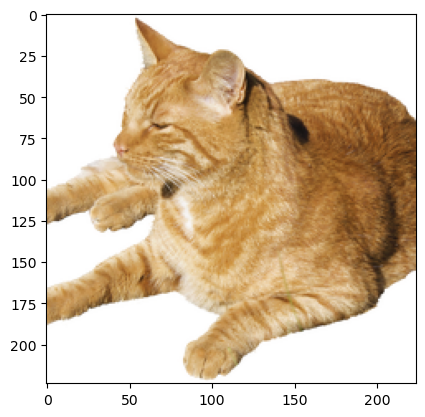

In [45]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('cat.png')
print(img.shape)  # 纵坐标：244 横坐标：244 RGB：3种颜色(红黄蓝)
print(np.max(img), np.min(img))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


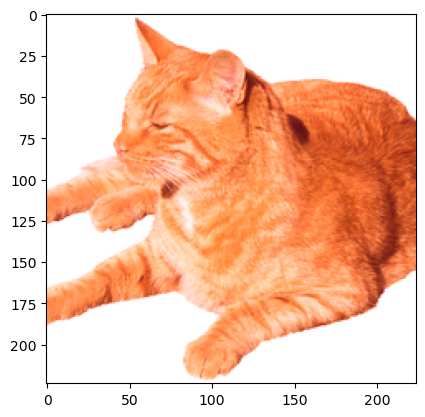

In [46]:
img = img + np.array([0.3,0,0])
# left of + has shape (224, 224, 3), right of + has shape (3,); broadcasting applies
plt.imshow(img)

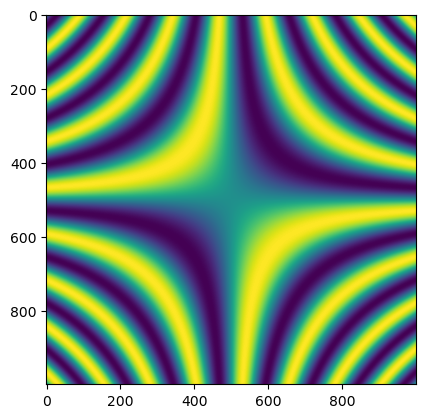

In [32]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

x_vals = np.linspace(-2, 2, 1000, dtype = np.float32) # shape (1000,)
y_vals = x_vals[:,None]                              # shape (1000,1)

img = np.sin(2 * np.pi * x_vals * y_vals) # x_vals * y_vals has shape (1000, 1000) due to broadcasting

plt.imshow(img) # since this doesn't have RGB, Python made up its own color scheme!

In [50]:
a = np.ones((2,1,3,5)) + np.ones((4,1,5))
b = np.ones((2,1,3,5))
c = np.ones((4,1,5))
print(b)
print(c)
print(a.shape)

[[[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]]]
[[[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]]
(2, 4, 3, 5)
